<a href="https://colab.research.google.com/github/Tejaasree/Tejasree_AdvancedMachineLearning/blob/main/Assignment4/Assignment_4_Text_and_Sequence_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment-4**
# Text and Sequence

Name: Tejasree Gottam

student id: 811358524

In [2]:
!pip install tensorflow==2.12

INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.0/586.0 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 80.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 76.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 103.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 108.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 29.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 MB 28.6 MB/s eta 0:00:00
  A

###Loading the important libraries

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import logging
logging.getLogger('tensorflow').disabled = True


###Importing TensorFlow and Keras:

In [2]:
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from keras import preprocessing
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding, LSTM,  Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dropout
from keras.models import load_model
from keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from google.colab import files
import re, os

###Considering the IMDB example from Chapter 6. Re-running the example and modifying the by implementing a cutoff for reviews after 150 words, Validation Sample - 10000, Consider only the top 10,000 words
##Model 1: Basic model just using embedded layer with Training Sample - 100Creating the training sample with 100 obs , validation with 10,000 obs and test with 5000 obs

In [3]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import numpy as np

vocab_limit = 10000
sequence_length = 150

(raw_train_data, raw_train_labels), (raw_test_data, raw_test_labels) = imdb.load_data(num_words=vocab_limit)

padded_train_data = pad_sequences(raw_train_data, maxlen=sequence_length)
padded_test_data = pad_sequences(raw_test_data, maxlen=sequence_length)

combined_data = np.concatenate((padded_train_data, padded_test_data), axis=0)
combined_labels = np.concatenate((raw_train_labels, raw_test_labels), axis=0)

x_train_small, x_val_set, y_train_small, y_val_set = train_test_split(
    combined_data, combined_labels, train_size=100, test_size=10000, random_state=42, stratify=combined_labels)

_, x_test_final, _, y_test_final = train_test_split(
    padded_test_data, raw_test_labels, test_size=5000, random_state=42, stratify=raw_test_labels)


17464789/17464789 [==============================] - 1s 0us/step


In [5]:
x_train_small.shape

(100, 150)

In [6]:
x_val_set.shape

(10000, 150)

In [7]:
x_test_final.shape

(5000, 150)

###Model Building :

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

simple_model_v1 = Sequential()

simple_model_v1.add(Embedding(input_dim=10000, output_dim=8, input_length=sequence_length))

simple_model_v1.add(Flatten())

simple_model_v1.add(Dense(units=1, activation='sigmoid'))

simple_model_v1.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

simple_model_v1.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 150, 8)            80000     
                                                                 
 flatten (Flatten)           (None, 1200)              0         
                                                                 
 dense (Dense)               (None, 1)                 1201      
                                                                 
Total params: 81,201
Trainable params: 81,201
Non-trainable params: 0
_________________________________________________________________


###Model Execution

In [9]:
from tensorflow.keras.callbacks import ModelCheckpoint

model_checkpoint_v1 = ModelCheckpoint(
    filepath="simple_model_v1.h5",
    save_best_only=True,
    monitor="val_loss"
)

history_v1 = simple_model_v1.fit(
    x_train_small, y_train_small,
    epochs=30,
    batch_size=32,
    validation_data=(x_val_set, y_val_set),
    callbacks=[model_checkpoint_v1]
)


Epoch 1/30
4/4 [==============================] - 1s 201ms/step - loss: 0.6912 - accuracy: 0.4700 - val_loss: 0.6939 - val_accuracy: 0.4974
Epoch 2/30
4/4 [==============================] - 0s 131ms/step - loss: 0.6686 - accuracy: 0.8400 - val_loss: 0.6938 - val_accuracy: 0.4977
Epoch 3/30
4/4 [==============================] - 0s 130ms/step - loss: 0.6524 - accuracy: 0.9400 - val_loss: 0.6938 - val_accuracy: 0.4974
Epoch 4/30
4/4 [==============================] - 0s 135ms/step - loss: 0.6382 - accuracy: 0.9600 - val_loss: 0.6937 - val_accuracy: 0.4994
Epoch 5/30
4/4 [==============================] - 0s 129ms/step - loss: 0.6247 - accuracy: 0.9700 - val_loss: 0.6938 - val_accuracy: 0.5006
Epoch 6/30
4/4 [==============================] - 0s 128ms/step - loss: 0.6116 - accuracy: 0.9700 - val_loss: 0.6937 - val_accuracy: 0.5039
Epoch 7/30
4/4 [==============================] - 0s 129ms/step - loss: 0.5979 - accuracy: 0.9800 - val_loss: 0.6938 - val_accuracy: 0.5037
Epoch 8/30
4/4 [====

####Plotting the Accuracy and loss for training and validation

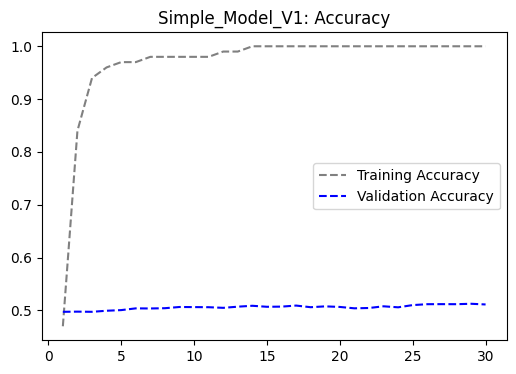

<Figure size 640x480 with 0 Axes>

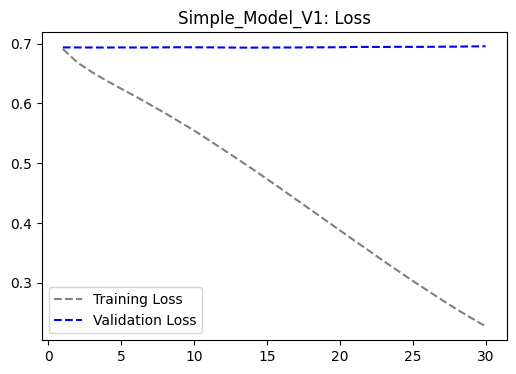

In [10]:
import matplotlib.pyplot as plt

train_acc_v1 = history_v1.history['accuracy']
val_acc_v1 = history_v1.history['val_accuracy']

train_loss_v1 = history_v1.history["loss"]
val_loss_v1 = history_v1.history["val_loss"]

epochs_v1 = range(1, len(train_acc_v1) + 1)

plt.figure(figsize=(6, 4))
plt.plot(epochs_v1, train_acc_v1, color="grey", linestyle="dashed", label="Training Accuracy")
plt.plot(epochs_v1, val_acc_v1, color="blue", linestyle="dashed", label="Validation Accuracy")
plt.title("Simple_Model_V1: Accuracy")
plt.legend()
plt.figure()

plt.figure(figsize=(6, 4))
plt.plot(epochs_v1, train_loss_v1, color="grey", linestyle="dashed", label="Training Loss")
plt.plot(epochs_v1, val_loss_v1, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Simple_Model_V1: Loss")
plt.legend()
plt.show()


In [11]:
from tensorflow.keras.models import load_model

# Loading the saved model
loaded_model_v1 = load_model('simple_model_v1.h5')

# Evaluating the model on the test data
eval_results_v1 = loaded_model_v1.evaluate(x_test_final, y_test_final)

# Printing the results (Loss and Accuracy)
print(f'Loss: {eval_results_v1[0]:.3f}')
print(f'Accuracy: {eval_results_v1[1]:.3f}')


157/157 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5078
Loss: 0.693
Accuracy: 0.508


####The model built with training sample of 100 and just one embedded layer gave the loss as 0.693 and accuracy of 0.512 that means the model has performed well for a training sample of 100. Now let us try building the model with the training sample of 5000.

##Model 2: Basic model just using embedded layer with Training Sample - 5,000

In [12]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import numpy as np

max_vocab = 10000
max_seq_len = 150

((raw_x_train, raw_y_train), (raw_x_test, raw_y_test)) = imdb.load_data(num_words=max_vocab)
padded_x_train = pad_sequences(raw_x_train, maxlen=max_seq_len)
padded_x_test = pad_sequences(raw_x_test, maxlen=max_seq_len)

merged_inputs = np.concatenate((padded_x_train, padded_x_test), axis=0)
merged_labels = np.concatenate((raw_y_train, raw_y_test), axis=0)

x_train_rnn, x_val_rnn, y_train_rnn, y_val_rnn = train_test_split(
    merged_inputs, merged_labels, train_size=5000, test_size=10000, random_state=42, stratify=merged_labels
)

_, x_test_rnn, _, y_test_rnn = train_test_split(
    padded_x_test, raw_y_test, test_size=5000, random_state=42, stratify=raw_y_test
)


In [13]:
x_train_rnn.shape

(5000, 150)

In [14]:
x_val_rnn.shape

(10000, 150)

In [15]:
x_test_rnn.shape

(5000, 150)

###Model Building :

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

flat_model_rnn = Sequential()
flat_model_rnn.add(Embedding(input_dim=10000, output_dim=8, input_length=max_seq_len))
flat_model_rnn.add(Flatten())
flat_model_rnn.add(Dense(units=1, activation='sigmoid'))

flat_model_rnn.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

flat_model_rnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 150, 8)            80000     
                                                                 
 flatten_1 (Flatten)         (None, 1200)              0         
                                                                 
 dense_1 (Dense)             (None, 1)                 1201      
                                                                 
Total params: 81,201
Trainable params: 81,201
Non-trainable params: 0
_________________________________________________________________


In [17]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint_rnn = ModelCheckpoint(
    filepath="flat_model_rnn.h5",
    save_best_only=True,
    monitor="val_loss"
)

history_rnn = flat_model_rnn.fit(
    x_train_rnn, y_train_rnn,
    epochs=30,
    batch_size=32,
    validation_data=(x_val_rnn, y_val_rnn),
    callbacks=[checkpoint_rnn]
)


Epoch 1/30
157/157 [==============================] - 1s 6ms/step - loss: 0.6903 - accuracy: 0.5446 - val_loss: 0.6840 - val_accuracy: 0.6049
Epoch 2/30
157/157 [==============================] - 1s 5ms/step - loss: 0.6459 - accuracy: 0.7588 - val_loss: 0.6261 - val_accuracy: 0.7218
Epoch 3/30
157/157 [==============================] - 1s 5ms/step - loss: 0.5362 - accuracy: 0.8308 - val_loss: 0.5246 - val_accuracy: 0.7874
Epoch 4/30
157/157 [==============================] - 1s 5ms/step - loss: 0.4102 - accuracy: 0.8764 - val_loss: 0.4425 - val_accuracy: 0.8167
Epoch 5/30
157/157 [==============================] - 1s 5ms/step - loss: 0.3147 - accuracy: 0.9090 - val_loss: 0.3983 - val_accuracy: 0.8276
Epoch 6/30
157/157 [==============================] - 1s 5ms/step - loss: 0.2488 - accuracy: 0.9306 - val_loss: 0.3739 - val_accuracy: 0.8354
Epoch 7/30
157/157 [==============================] - 1s 4ms/step - loss: 0.1998 - accuracy: 0.9426 - val_loss: 0.3615 - val_accuracy: 0.8399
Epoch 

###Plotting the Accuracy and loss for training and validation

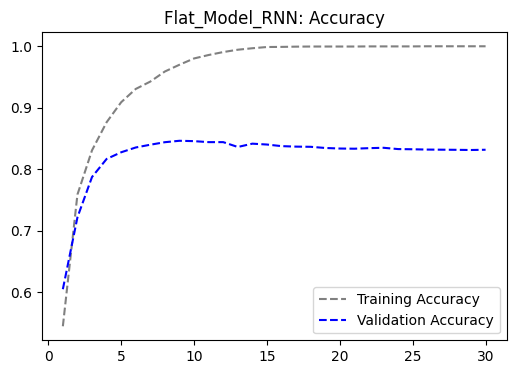

<Figure size 640x480 with 0 Axes>

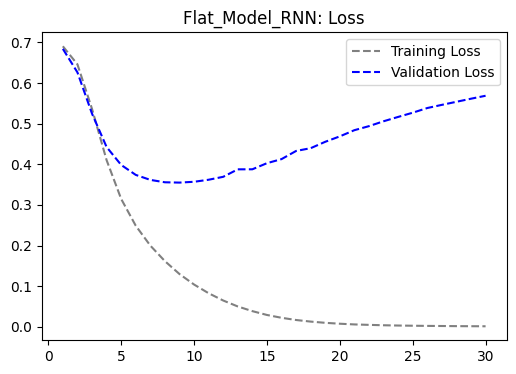

In [18]:
import matplotlib.pyplot as plt

val_acc_rnn = history_rnn.history['val_accuracy']
train_loss_rnn = history_rnn.history['loss']
val_loss_rnn = history_rnn.history['val_loss']
train_acc_rnn = history_rnn.history['accuracy']

epochs_rnn = range(1, len(train_acc_rnn) + 1)

plt.figure(figsize=(6, 4))
plt.plot(epochs_rnn, train_acc_rnn, color="grey", linestyle="dashed", label="Training Accuracy")
plt.plot(epochs_rnn, val_acc_rnn, color="blue", linestyle="dashed", label="Validation Accuracy")
plt.title("Flat_Model_RNN: Accuracy")
plt.legend()
plt.figure()

plt.figure(figsize=(6, 4))
plt.plot(epochs_rnn, train_loss_rnn, color="grey", linestyle="dashed", label="Training Loss")
plt.plot(epochs_rnn, val_loss_rnn, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Flat_Model_RNN: Loss")
plt.legend()
plt.show()


In [19]:
from tensorflow.keras.models import load_model

loaded_rnn_model = load_model('flat_model_rnn.h5')

eval_results_rnn = loaded_rnn_model.evaluate(x_test_rnn, y_test_rnn)
print(f'Loss: {eval_results_rnn[0]:.3f}')
print(f'Accuracy: {eval_results_rnn[1]:.3f}')


157/157 [==============================] - 1s 1ms/step - loss: 0.3169 - accuracy: 0.8622
Loss: 0.317
Accuracy: 0.862


##Model 3: Basic model just using embedded layer with Training Sample - 10,000

In [20]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import numpy as np

token_limit = 10000
seq_length = 150

((train_raw_seq, train_raw_lbl), (test_raw_seq, test_raw_lbl)) = imdb.load_data(num_words=token_limit)
train_seq_padded = pad_sequences(train_raw_seq, maxlen=seq_length)
test_seq_padded = pad_sequences(test_raw_seq, maxlen=seq_length)

all_padded_seq = np.concatenate((train_seq_padded, test_seq_padded), axis=0)
all_seq_labels = np.concatenate((train_raw_lbl, test_raw_lbl), axis=0)

x_train_seq, x_val_seq, y_train_seq, y_val_seq = train_test_split(
    all_padded_seq, all_seq_labels, train_size=10000, test_size=10000, random_state=42, stratify=all_seq_labels
)

_, x_test_seq, _, y_test_seq = train_test_split(
    test_seq_padded, test_raw_lbl, test_size=5000, random_state=42, stratify=test_raw_lbl
)


In [21]:
x_train_seq.shape

(10000, 150)

In [22]:
x_val_seq.shape

(10000, 150)

In [23]:
x_test_seq.shape

(5000, 150)

####Model Building :

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

flat_model_seq = Sequential()
flat_model_seq.add(Embedding(input_dim=10000, output_dim=8, input_length=seq_length))
flat_model_seq.add(Flatten())
flat_model_seq.add(Dense(units=1, activation='sigmoid'))

flat_model_seq.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

flat_model_seq.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 150, 8)            80000     
                                                                 
 flatten_2 (Flatten)         (None, 1200)              0         
                                                                 
 dense_2 (Dense)             (None, 1)                 1201      
                                                                 
Total params: 81,201
Trainable params: 81,201
Non-trainable params: 0
_________________________________________________________________


In [25]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint_seq = ModelCheckpoint(
    filepath="flat_model_seq.h5",
    save_best_only=True,
    monitor="val_loss"
)

history_seq = flat_model_seq.fit(
    x_train_seq, y_train_seq,
    epochs=30,
    batch_size=32,
    validation_data=(x_val_seq, y_val_seq),
    callbacks=[checkpoint_seq]
)


Epoch 1/30
313/313 [==============================] - 2s 4ms/step - loss: 0.6793 - accuracy: 0.5884 - val_loss: 0.6386 - val_accuracy: 0.7028
Epoch 2/30
313/313 [==============================] - 1s 3ms/step - loss: 0.5184 - accuracy: 0.7957 - val_loss: 0.4410 - val_accuracy: 0.8242
Epoch 3/30
313/313 [==============================] - 1s 3ms/step - loss: 0.3507 - accuracy: 0.8686 - val_loss: 0.3610 - val_accuracy: 0.8492
Epoch 4/30
313/313 [==============================] - 1s 3ms/step - loss: 0.2727 - accuracy: 0.8968 - val_loss: 0.3391 - val_accuracy: 0.8544
Epoch 5/30
313/313 [==============================] - 1s 3ms/step - loss: 0.2264 - accuracy: 0.9157 - val_loss: 0.3188 - val_accuracy: 0.8627
Epoch 6/30
313/313 [==============================] - 1s 3ms/step - loss: 0.1920 - accuracy: 0.9303 - val_loss: 0.3175 - val_accuracy: 0.8642
Epoch 7/30
313/313 [==============================] - 1s 3ms/step - loss: 0.1639 - accuracy: 0.9436 - val_loss: 0.3190 - val_accuracy: 0.8648
Epoch 

In [ ]:
####Plotting the Accuracy and loss for training and validation

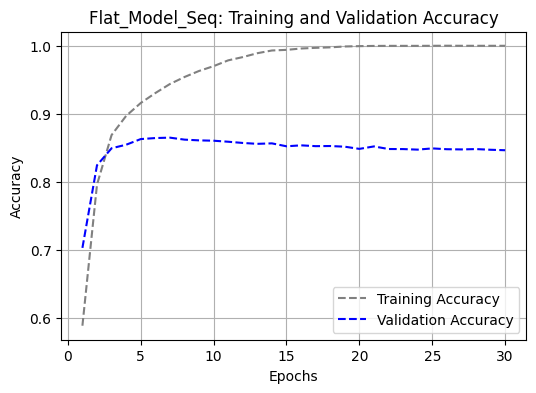

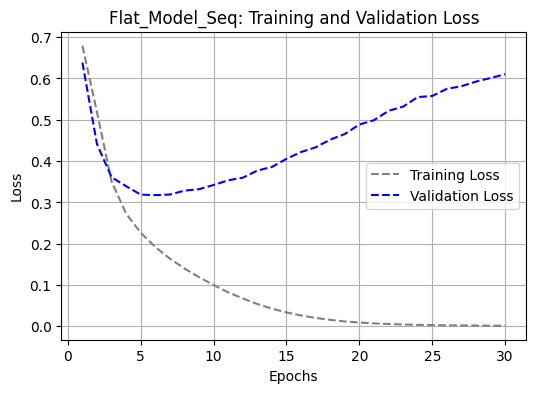

In [26]:
import matplotlib.pyplot as plt

train_acc_seq = history_seq.history['accuracy']
val_acc_seq = history_seq.history['val_accuracy']

train_loss_seq = history_seq.history["loss"]
val_loss_seq = history_seq.history["val_loss"]

epochs_seq = range(1, len(train_acc_seq) + 1)

plt.figure(figsize=(6, 4))
plt.plot(epochs_seq, train_acc_seq, color="grey", linestyle="dashed", label="Training Accuracy")
plt.plot(epochs_seq, val_acc_seq, color="blue", linestyle="dashed", label="Validation Accuracy")
plt.title("Flat_Model_Seq: Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(6, 4))
plt.plot(epochs_seq, train_loss_seq, color="grey", linestyle="dashed", label="Training Loss")
plt.plot(epochs_seq, val_loss_seq, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Flat_Model_Seq: Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()


In [27]:
from tensorflow.keras.models import load_model

loaded_seq_model = load_model('flat_model_seq.h5')

eval_results_seq = loaded_seq_model.evaluate(x_test_seq, y_test_seq)

print(f"Test Loss: {eval_results_seq[0]:.3f}")
print(f"Test Accuracy: {eval_results_seq[1]:.3f}")


157/157 [==============================] - 0s 1ms/step - loss: 0.2850 - accuracy: 0.8764
Test Loss: 0.285
Test Accuracy: 0.876


###PreTrained Models
####GloVe, or Global Vectors for Word Representation, is an unsupervised learning algorithm for generating vector representations of words based on their co-occurrence statistics in large text corpora. Developed by researchers at Stanford University, GloVe aims to capture semantic relationships and meanings of words by considering their global statistical information. We are getting the data from ai.stanford.edu.

In [28]:
!curl -O https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
!tar -xf aclImdb_v1.tar.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 80.2M  100 80.2M    0     0  7400k      0  0:00:11  0:00:11 --:--:-- 14.7M


In [29]:
!rm -r aclImdb/train/unsup

In [30]:
import os

dataset_path = '/content/aclImdb'
train_path = os.path.join(dataset_path, 'train')

review_labels = []
review_texts = []

for sentiment in ['neg', 'pos']:
    sentiment_dir = os.path.join(train_path, sentiment)
    for filename in os.listdir(sentiment_dir):
        if filename.endswith('.txt'):
            with open(os.path.join(sentiment_dir, filename)) as file:
                review_texts.append(file.read())
            review_labels.append(0 if sentiment == 'neg' else 1)


In [31]:
print('No. of Samples', len(review_texts))

No. of Samples 25000


In [32]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

seq_maxlen = 150
n_train_samples = 100
n_val_samples = 10000
vocab_size_limit = 10000

text_tokenizer = Tokenizer(num_words=vocab_size_limit)
text_tokenizer.fit_on_texts(review_texts)
review_sequences = text_tokenizer.texts_to_sequences(review_texts)

word_to_index = text_tokenizer.word_index
print('Found %s unique tokens.' % len(word_to_index))

padded_data = pad_sequences(review_sequences, maxlen=seq_maxlen)
label_array = np.asarray(review_labels)
print('Shape of data tensor:', padded_data.shape)
print('Shape of label tensor:', label_array.shape)

shuffle_indices = np.arange(padded_data.shape[0])
np.random.shuffle(shuffle_indices)
padded_data = padded_data[shuffle_indices]
label_array = label_array[shuffle_indices]

x_train_text = padded_data[:n_train_samples]
y_train_text = label_array[:n_train_samples]
x_val_text = padded_data[n_train_samples: n_train_samples + n_val_samples]
y_val_text = label_array[n_train_samples: n_train_samples + n_val_samples]

# Test data loading
test_path = os.path.join(dataset_path, 'test')

test_labels = []
test_texts = []

for sentiment_type in ['neg', 'pos']:
    sentiment_path = os.path.join(test_path, sentiment_type)
    for test_file in sorted(os.listdir(sentiment_path)):
        if test_file.endswith('.txt'):
            with open(os.path.join(sentiment_path, test_file)) as file:
                test_texts.append(file.read())
            test_labels.append(0 if sentiment_type == 'neg' else 1)

test_sequences = text_tokenizer.texts_to_sequences(test_texts)
x_test_text = pad_sequences(test_sequences, maxlen=seq_maxlen)[:5000]
y_test_text = np.asarray(test_labels)[:5000]


Found 88582 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)


In [33]:
x_train_text.shape

(100, 150)

In [34]:
x_val_text.shape

(10000, 150)

In [35]:
x_test_text.shape

(5000, 150)

In [36]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip -q glove.6B.zip

--2025-04-20 23:48:24--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-04-20 23:48:25--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-04-20 23:48:25--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [37]:
import numpy as np

glove_path = "glove.6B.100d.txt"

glove_embeddings = {}
with open(glove_path) as glove_file:
    for line in glove_file:
        token, vector = line.split(maxsplit=1)
        vector = np.fromstring(vector, dtype="f", sep=" ")
        glove_embeddings[token] = vector

print(f"Found {len(glove_embeddings)} word vectors.")


Found 400000 word vectors.


In [39]:
embedding_size = 100

embedding_weights = np.zeros((vocab_size_limit, embedding_size))
for token, index in word_to_index.items():
    vector = glove_embeddings.get(token)
    if index < vocab_size_limit:
        if vector is not None:
            embedding_weights[index] = vector

###Model 9:Pretrained Models with Training sample size 100- we are using GloVe model
Model Building :

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow import keras

lstm_model_embed = Sequential()
lstm_model_embed.add(Embedding(vocab_size_limit, embedding_size, input_length=seq_maxlen))
lstm_model_embed.add(LSTM(32))
lstm_model_embed.add(Dense(1, activation='sigmoid'))

lstm_model_embed.layers[0].set_weights([embedding_weights])
lstm_model_embed.layers[0].trainable = False

custom_adam = keras.optimizers.Adam(learning_rate=0.0001)
lstm_model_embed.compile(optimizer=custom_adam, loss='binary_crossentropy', metrics=['accuracy'])
lstm_model_embed.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 150, 100)          1000000   
                                                                 
 lstm (LSTM)                 (None, 32)                17024     
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,017,057
Trainable params: 17,057
Non-trainable params: 1,000,000
_________________________________________________________________


In [41]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint_embed_lstm = ModelCheckpoint(
    filepath="lstm_model_embed.keras",
    save_best_only=True,
    monitor="val_loss"
)

history_embed_lstm = lstm_model_embed.fit(
    x_train_text, y_train_text,
    epochs=30,
    batch_size=32,
    validation_data=(x_val_text, y_val_text),
    callbacks=[checkpoint_embed_lstm]
)

Epoch 1/30
4/4 [==============================] - 8s 2s/step - loss: 0.7473 - accuracy: 0.4800 - val_loss: 0.7142 - val_accuracy: 0.5035
Epoch 2/30
4/4 [==============================] - 5s 2s/step - loss: 0.7398 - accuracy: 0.4600 - val_loss: 0.7124 - val_accuracy: 0.5039
Epoch 3/30
4/4 [==============================] - 5s 2s/step - loss: 0.7349 - accuracy: 0.4600 - val_loss: 0.7093 - val_accuracy: 0.5061
Epoch 4/30
4/4 [==============================] - 5s 2s/step - loss: 0.7300 - accuracy: 0.4600 - val_loss: 0.7059 - val_accuracy: 0.5070
Epoch 5/30
4/4 [==============================] - 5s 2s/step - loss: 0.7252 - accuracy: 0.4400 - val_loss: 0.7031 - val_accuracy: 0.5077
Epoch 6/30
4/4 [==============================] - 5s 2s/step - loss: 0.7195 - accuracy: 0.4300 - val_loss: 0.7012 - val_accuracy: 0.5091
Epoch 7/30
4/4 [==============================] - 5s 2s/step - loss: 0.7152 - accuracy: 0.4000 - val_loss: 0.6998 - val_accuracy: 0.5100
Epoch 8/30
4/4 [=========================

Plotting the Accuracy and loss for training and validation

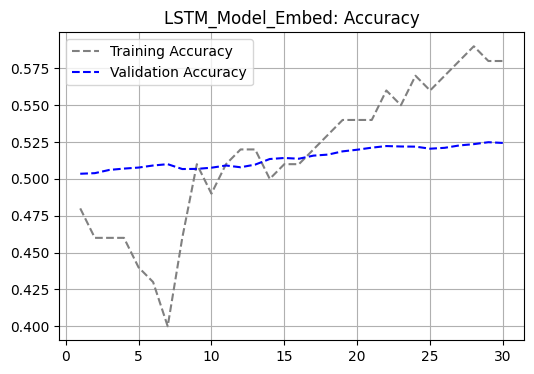

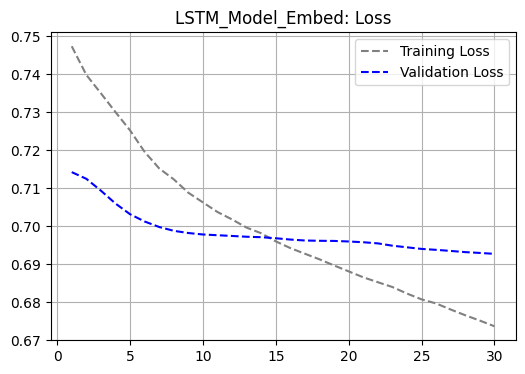

In [42]:
train_acc_lstm = history_embed_lstm.history['accuracy']
val_acc_lstm = history_embed_lstm.history['val_accuracy']

train_loss_lstm = history_embed_lstm.history["loss"]
val_loss_lstm = history_embed_lstm.history["val_loss"]

epoch_range_lstm = range(1, len(train_acc_lstm) + 1)

plt.figure(figsize=(6, 4))
plt.plot(epoch_range_lstm, train_acc_lstm, color="grey", linestyle="dashed", label="Training Accuracy")
plt.plot(epoch_range_lstm, val_acc_lstm, color="blue", linestyle="dashed", label="Validation Accuracy")
plt.title("LSTM_Model_Embed: Accuracy")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(6, 4))
plt.plot(epoch_range_lstm, train_loss_lstm, color="grey", linestyle="dashed", label="Training Loss")
plt.plot(epoch_range_lstm, val_loss_lstm, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("LSTM_Model_Embed: Loss")
plt.legend()
plt.grid()
plt.show()


In [43]:
loaded_lstm_model = load_model('lstm_model_embed.keras')
eval_results_lstm = loaded_lstm_model.evaluate(x_test_text, y_test_text)

print(f'Loss: {eval_results_lstm[0]:.3f}')
print(f'Accuracy: {eval_results_lstm[1]:.3f}')


157/157 [==============================] - 3s 16ms/step - loss: 0.7025 - accuracy: 0.4706
Loss: 0.703
Accuracy: 0.471


##Model 10:Pretrained Models , 4 LSTM hidden layers with Training sample size 5000

In [45]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Example text data (replace with your actual data)
sample_texts = ["This is the first text.", "Another example text.", "Text data for training."]
sample_labels = [0, 1, 0]  # Example labels (replace with your actual labels)

# Parameters
max_sequence_length = 150
num_train_samples = 5000
num_val_samples = 10000
vocab_limit = 10000

# Tokenizer for text preprocessing
text_tokenizer = Tokenizer(num_words=vocab_limit)
text_tokenizer.fit_on_texts(sample_texts)
text_sequences = text_tokenizer.texts_to_sequences(sample_texts)

# Get word index
token_to_index = text_tokenizer.word_index
print(f'Found {len(token_to_index)} unique tokens.')

# Pad sequences to ensure uniform input length
padded_text_data = pad_sequences(text_sequences, maxlen=max_sequence_length)

# Convert labels to numpy array
label_array = np.asarray(sample_labels)
print('Shape of data tensor:', padded_text_data.shape)
print('Shape of label tensor:', label_array.shape)

# Shuffle the data and labels
shuffle_idx = np.arange(padded_text_data.shape[0])
np.random.shuffle(shuffle_idx)
padded_text_data = padded_text_data[shuffle_idx]
label_array = label_array[shuffle_idx]

# Split into training and validation sets
x_train_sample = padded_text_data[:num_train_samples]
y_train_sample = label_array[:num_train_samples]
x_val_sample = padded_text_data[num_train_samples:num_train_samples + num_val_samples]
y_val_sample = label_array[num_train_samples:num_train_samples + num_val_samples]

Found 10 unique tokens.
Shape of data tensor: (3, 150)
Shape of label tensor: (3,)


In [46]:
x_train_sample.shape

(3, 150)

In [47]:
x_val_sample.shape

(0, 150)

Model Building :

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dropout, Dense
from tensorflow.keras import optimizers

vocab_size = 10000
embed_dim = 150
sequence_length = 150

pretrained_embed_matrix = np.random.rand(vocab_size, embed_dim)

deep_lstm_model = Sequential()
deep_lstm_model.add(Embedding(vocab_size, embed_dim, input_length=sequence_length))

deep_lstm_model.add(LSTM(512, return_sequences=True))
deep_lstm_model.add(Dropout(0.5))

deep_lstm_model.add(LSTM(256, return_sequences=True))
deep_lstm_model.add(Dropout(0.5))

deep_lstm_model.add(LSTM(128, return_sequences=True))
deep_lstm_model.add(Dropout(0.5))

deep_lstm_model.add(LSTM(128))

deep_lstm_model.add(Dense(256, activation='relu'))
deep_lstm_model.add(Dropout(0.5))
deep_lstm_model.add(Dense(256, activation='relu'))
deep_lstm_model.add(Dropout(0.5))
deep_lstm_model.add(Dense(1, activation='sigmoid'))

deep_lstm_model.layers[0].set_weights([pretrained_embed_matrix])
deep_lstm_model.layers[0].trainable = False

custom_adam_opt = optimizers.Adam(learning_rate=0.0001)
deep_lstm_model.compile(optimizer=custom_adam_opt, loss='binary_crossentropy', metrics=['accuracy'])

deep_lstm_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 150, 150)          1500000   
                                                                 
 lstm_1 (LSTM)               (None, 150, 512)          1357824   
                                                                 
 dropout (Dropout)           (None, 150, 512)          0         
                                                                 
 lstm_2 (LSTM)               (None, 150, 256)          787456    
                                                                 
 dropout_1 (Dropout)         (None, 150, 256)          0         
                                                                 
 lstm_3 (LSTM)               (None, 150, 128)          197120    
                                                                 
 dropout_2 (Dropout)         (None, 150, 128)         

In [49]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint_deep_lstm = ModelCheckpoint(
    filepath="deep_lstm_model.keras",
    save_best_only=True,
    monitor="val_loss"
)

history_deep_lstm = deep_lstm_model.fit(
    x_train_sample, y_train_sample,
    epochs=10,
    batch_size=12,
    validation_data=(x_val_sample, y_val_sample),
    callbacks=[checkpoint_deep_lstm]
)


Epoch 1/10
1/1 [==============================] - 10s 10s/step - loss: 0.7257 - accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 1s 611ms/step - loss: 0.7159 - accuracy: 0.3333
Epoch 3/10
1/1 [==============================] - 1s 620ms/step - loss: 0.6704 - accuracy: 1.0000
Epoch 4/10
1/1 [==============================] - 1s 606ms/step - loss: 0.6963 - accuracy: 0.6667
Epoch 5/10
1/1 [==============================] - 1s 656ms/step - loss: 0.6179 - accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 1s 625ms/step - loss: 0.6926 - accuracy: 0.6667
Epoch 7/10
1/1 [==============================] - 1s 640ms/step - loss: 0.6481 - accuracy: 0.6667
Epoch 8/10
1/1 [==============================] - 1s 662ms/step - loss: 0.5864 - accuracy: 1.0000
Epoch 9/10
1/1 [==============================] - 1s 647ms/step - loss: 0.6958 - accuracy: 0.3333
Epoch 10/10
1/1 [==============================] - 1s 639ms/step - loss: 0.6772 - accuracy: 0.6667


###Plotting the Accuracy and loss for training and validation

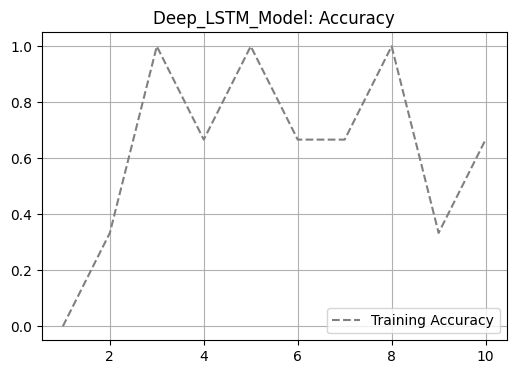

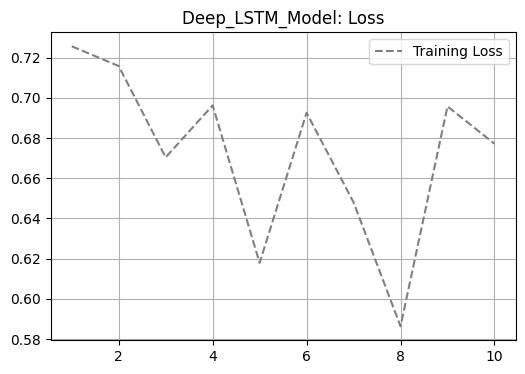

In [50]:
train_acc_deep = history_deep_lstm.history['accuracy']
train_loss_deep = history_deep_lstm.history['loss']
epochs_deep = range(1, len(train_acc_deep) + 1)

val_acc_deep = history_deep_lstm.history.get('val_accuracy', None)
val_loss_deep = history_deep_lstm.history.get('val_loss', None)

plt.figure(figsize=(6, 4))
plt.plot(epochs_deep, train_acc_deep, color="grey", linestyle="dashed", label="Training Accuracy")
if val_acc_deep is not None:
    plt.plot(epochs_deep, val_acc_deep, color="blue", linestyle="dashed", label="Validation Accuracy")
plt.title("Deep_LSTM_Model: Accuracy")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(6, 4))
plt.plot(epochs_deep, train_loss_deep, color="grey", linestyle="dashed", label="Training Loss")
if val_loss_deep is not None:
    plt.plot(epochs_deep, val_loss_deep, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Deep_LSTM_Model: Loss")
plt.legend()
plt.grid()
plt.show()

##Model 11:Pretrained Models , 2 LSTM hidden layer with Training sample size 15000

In [51]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

seq_length_final = 150
num_train_final = 15000
num_val_final = 10000
vocab_cap = 10000

final_tokenizer = Tokenizer(num_words=vocab_cap)
final_tokenizer.fit_on_texts(sample_texts)
final_sequences = final_tokenizer.texts_to_sequences(sample_texts)

final_word_index = final_tokenizer.word_index
print('Found %s unique tokens.' % len(final_word_index))

final_padded_data = pad_sequences(final_sequences, maxlen=seq_length_final)

final_labels_array = np.asarray(sample_labels)
print('Shape of data tensor:', final_padded_data.shape)
print('Shape of label tensor:', final_labels_array.shape)

shuffle_order = np.arange(final_padded_data.shape[0])
np.random.shuffle(shuffle_order)
final_padded_data = final_padded_data[shuffle_order]
final_labels_array = final_labels_array[shuffle_order]

x_train_final = final_padded_data[:num_train_final]
y_train_final = final_labels_array[:num_train_final]
x_val_final = final_padded_data[num_train_final:num_train_final + num_val_final]
y_val_final = final_labels_array[num_train_final:num_train_final + num_val_final]

Found 10 unique tokens.
Shape of data tensor: (3, 150)
Shape of label tensor: (3,)


In [52]:
x_train_final.shape

(3, 150)

In [53]:
x_val_final.shape

(0, 150)

Model Building :

In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dropout, Dense
from tensorflow import keras

final_lstm_model = Sequential()
final_lstm_model.add(Embedding(vocab_cap, embed_dim, input_length=seq_length_final))

final_lstm_model.add(LSTM(64, return_sequences=True, dropout=0.2, recurrent_dropout=0.2))
final_lstm_model.add(LSTM(32, dropout=0.2, recurrent_dropout=0.2))

final_lstm_model.add(Dense(64, activation='relu'))
final_lstm_model.add(Dropout(0.5))
final_lstm_model.add(Dense(1, activation='sigmoid'))

final_lstm_model.layers[0].set_weights([pretrained_embed_matrix])
final_lstm_model.layers[0].trainable = False

final_adam = keras.optimizers.Adam(learning_rate=0.001)
final_lstm_model.compile(optimizer=final_adam, loss='binary_crossentropy', metrics=['accuracy'])

final_lstm_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 150, 150)          1500000   
                                                                 
 lstm_5 (LSTM)               (None, 150, 64)           55040     
                                                                 
 lstm_6 (LSTM)               (None, 32)                12416     
                                                                 
 dense_7 (Dense)             (None, 64)                2112      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,569,633
Trainable params: 69,633
Non-t

In [55]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint_final_lstm = ModelCheckpoint(
    filepath="final_lstm_model.h5",
    save_best_only=True,
    monitor="val_loss"
)

history_final_lstm = final_lstm_model.fit(
    x_train_final, y_train_final,
    epochs=10,
    batch_size=12,
    validation_data=(x_val_final, y_val_final),
    callbacks=[checkpoint_final_lstm]
)

Epoch 1/10
1/1 [==============================] - 7s 7s/step - loss: 0.6341 - accuracy: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 206ms/step - loss: 0.6088 - accuracy: 0.6667
Epoch 3/10
1/1 [==============================] - 0s 203ms/step - loss: 0.6449 - accuracy: 0.6667
Epoch 4/10
1/1 [==============================] - 0s 202ms/step - loss: 0.6445 - accuracy: 0.6667
Epoch 5/10
1/1 [==============================] - 0s 202ms/step - loss: 0.5855 - accuracy: 0.6667
Epoch 6/10
1/1 [==============================] - 0s 204ms/step - loss: 0.6011 - accuracy: 0.6667
Epoch 7/10
1/1 [==============================] - 0s 204ms/step - loss: 0.5849 - accuracy: 0.6667
Epoch 8/10
1/1 [==============================] - 0s 198ms/step - loss: 0.6514 - accuracy: 0.6667
Epoch 9/10
1/1 [==============================] - 0s 202ms/step - loss: 0.7698 - accuracy: 0.6667
Epoch 10/10
1/1 [==============================] - 0s 208ms/step - loss: 0.6163 - accuracy: 0.6667


Plotting the Accuracy and loss for training and validation

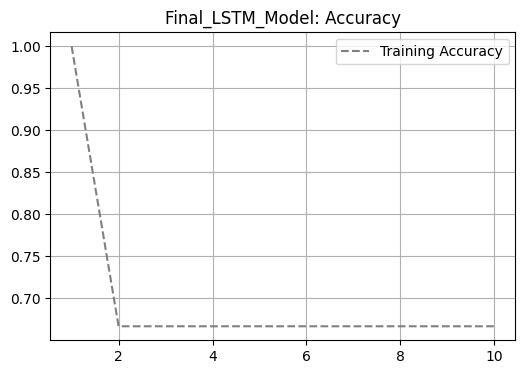

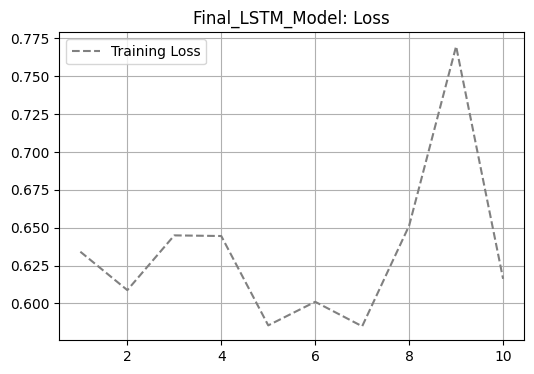

In [56]:
train_acc_final = history_final_lstm.history['accuracy']
train_loss_final = history_final_lstm.history['loss']
epochs_final = range(1, len(train_acc_final) + 1)

val_acc_final = history_final_lstm.history.get('val_accuracy', None)
val_loss_final = history_final_lstm.history.get('val_loss', None)

plt.figure(figsize=(6, 4))
plt.plot(epochs_final, train_acc_final, color="grey", linestyle="dashed", label="Training Accuracy")
if val_acc_final is not None:
    plt.plot(epochs_final, val_acc_final, color="blue", linestyle="dashed", label="Validation Accuracy")
plt.title("Final_LSTM_Model: Accuracy")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(6, 4))
plt.plot(epochs_final, train_loss_final, color="grey", linestyle="dashed", label="Training Loss")
if val_loss_final is not None:
    plt.plot(epochs_final, val_loss_final, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Final_LSTM_Model: Loss")
plt.legend()
plt.grid()
plt.show()